# Library Calls

Calls the libraries needed to run the functions.

In [1]:
#call libraries that will be used throughout the project
%matplotlib inline
from math import *
from numpy import *
from matplotlib import *
import sympy
import cmath

# Runge-Kutta 4th Order Function

Returns the Runge-Kutta 4th Order Classical solution of a spring-mass-damper system system.

Takes inputs:

- ti = initial time step (usually 0)

- tf = final time step

- dt = time step

- ft = force function of i (as a string)

- x0 = initial position

- v0 = initial velocity

- m = mass

- z = $\zeta$

- o = $\omega_n$

Returns outputs:

- t = time vector

- f = force vector

- x = position vector

- v = velocity vector


In [2]:
def spring_mass_damper(ti, tf, dt, ft, x0, v0, m, z, o):
    #intialize study region
    steps = int((tf - ti)/dt + 1)
    t = linspace(ti, tf, steps)
    
    #intialize force vector
    f = zeros(steps)
    for i in range(0, steps):
        f[i] = eval(ft)
    
    #intialize position and velocity vectors
    x = zeros(steps)
    v = zeros(steps)
    x[0] = x0
    v[0] = v0
    h = t[1] - t[0]
    
    #define system differential equation
    def system(X, V, F):
        return F/m - 2*z*o*V - (o**2)*X
    
    #Runge-Kutta 4th Order Classical Method Constants
    c1  =  1/6
    c2  =  2/6
    c3  =  2/6
    c4  =  1/6

    a2  =  1/2
    b21 =  1/2
    
    a3  =  1/2
    b31 =  0
    b32 =  1/2
    
    a4  =  1
    b41 =  0
    b42 =  0
    b43 =  1
    
    #run Runge-Kutta 4th Order Classical Method
    for i in range (0, steps - 1):
        x1 = x[i]
        v1 = v[i]
        a1 = system(x1, v1, f[i])
        
        x2 = x[i] + (b21*v1)*h
        v2 = v[i] + (b21*a1)*h
        a2 = system(x2, v2, f[i])
        
        x3 = x[i] + (b31*v2 + b32*v2)*h
        v3 = v[i] + (b31*a2 + b32*a2)*h
        a3 = system(x3, v3, f[i])
        
        x4 = x[i] + (b41*v3 + b42*v3 + b43*v3)*h
        v4 = v[i] + (b41*a3 + b42*a3 + b43*a3)*h
        a4 = system(x4, v4, f[i])
        
        x[i + 1] = x[i] + (c1*v1 + c2*v2 + c3*v3 + c4*v4)*h
        v[i + 1] = v[i] + (c1*a1 + c2*a2 + c3*a3 + c4*a4)*h
    return [t, f, x, v]
#def spring_mass_damper(ti, tf, dt, ft, x0, v0, m, z, o)

# Analytical Over-Damped Function

Returns the analytical output of an over-damped system.

Takes inputs:

- t = time vector

- x0 = initial position

- v0 = initial velocity

- z = $\zeta$

- o = $\omega_n$

Returns outputs:

- x = position vector

- v = velocity vector

- title = graph title

z = $\zeta$

o = $\omega_n$

* * *

$\large x_{\small overdamped}(t) = C_1 e^{\lambda_1 t} + C_2 e^{\lambda_2 t}$

$\large v_{\small overdamped}(t) = C_1 \lambda_1 e^{\lambda_1 t} + C_2 \lambda_2 e^{\lambda_2 t}$

Let $x(o) = x_0$ and $v(0) = v_0$. So that:

$x(0) = C_1 + C_2 = x_0$

$\equiv C_1 = x_0 - C_2$

and:

$v(0) = C_1 \lambda_1 + C_2 \lambda_2 = v_0$ 

$\equiv (x_0 - C_2) \lambda_1 + C_2 \lambda_2 = v_0$

$\equiv x_0 \lambda_1 - C_2 \lambda_1 + C_2 \lambda_2 = v_0$

$\equiv C_2 (\lambda_2 - \lambda_1) = v_0 - x_0 \lambda_1$

$ \equiv C_2 = \frac{v_0 - x_0 \lambda_1}{\lambda_2 - \lambda_1}$

Thus:

$\large C_1 = x_0 - \frac{v_0 - x_0 \lambda_1}{\lambda_2 - \lambda_1}$

$\large C_2 = \frac{v_0 - x_0 \lambda_1}{\lambda_2 - \lambda_1}$

In [3]:
def spring_mass_damper_overdamped(t, x0, v0, z, o):
    title = f'Analytical Over-Damped Solution'
    x = zeros(len(t))
    v = zeros(len(t))    
    
    #calculate lambdas of the system
    lam_1 = -o*(z-sqrt(z**2-1))
    lam_2 = -o*(z+sqrt(z**2-1))
    
    #calculate the constants
    C1 = x0-(v0-x0*lam_1)/(lam_2-lam_1)
    C2 = (v0-x0*lam_1)/(lam_2-lam_1)

    #run analytical solution of an over-damped system
    for i in range(0, len(t)):
        x[i] = C1*exp(lam_1*t[i])+C2*exp(lam_2*t[i])
        v[i] = lam_1*C1*exp(lam_1*t[i])+lam_2*C2*exp(lam_2*t[i])
        
    return [x, v, title]
#def spring_mass_damper_overdamped(t, x0, v0, z, o)

# Analytical Critically-Damped Function

Returns the analytical output of a critically-damped system.

Takes inputs:

- t = time vector

- x0 = initial position

- v0 = initial velocity

- z = $\zeta$

- o = $\omega_n$

Returns outputs:

- x = position vector

- v = velocity vector

- title = graph title

* * *

$\large x_{\small criticallydamped}(t) = C_1 e^{-\omega_n t} + C_2 e^{-\omega_n t}$

$\large v_{\small criticallydamped}(t) = -C_1 \omega_n e^{-\omega_n t} + C_2 (e^{-\omega_n t} - \omega_n t e^{-\omega_n t})$

Let $x(o) = x_0$ and $v(0) = v_0$. So that:

$x(0) = C_1 = x_0$

and:

$v(0) = -C_1 \omega_n + C_2 = v_0$ 

$\equiv -x_0 \omega_n + C_2 = v_0$

$\equiv C_2 = v_0 + x_0 \omega_n$

Thus:

$\large C_1 = x_0$

$\large C_2 = v_0 + x_0 \omega_n$

In [4]:
def spring_mass_damper_criticallydamped(t, x0, v0, z, o):
    title = f'Analytical Critically-Damped Solution'
    x = zeros(len(t))
    v = zeros(len(t))
    
    #calculate the constants
    C1 = x0
    C2 = v0+x0*o
    
    #run analytical solution of an critically-damped system
    for i in range(0, len(t)):
        x[i] = C1*exp(-o*t[i])+C2*t[i]*exp(-o*t[i])
        v[i] = -C1*o*exp(-o*t[i])+C2*(exp(-o*t[i])-o*t[i]*exp(-o*t[i]))
        
    return [x, v, title]
#def spring_mass_damper_criticallydamped(t, x0, v0, z, o)

# Analytical Under-Damped Function

Returns the analytical output of an under-damped system.

Takes inputs:

- t = time vector

- x0 = initial position

- v0 = initial velocity

- z = $\zeta$

- o = $\omega_n$

Returns outputs:

- x = position vector

- v = velocity vector

- title = graph title

* * *

$x_{\small underdamp}(t) = e^{-\zeta\omega_n t} [ D_1 cos({\omega_d t}) + D_2 sin({\omega_d t}) ]$

$v(t) = e^{-\zeta\omega_n t} [ -D_1 ( \omega_d sin({\omega_d t}) + \zeta \omega_n cos({\omega_d t})) + D_2 (\omega_d cos({\omega_d t}) - \zeta \omega_n sin({\omega_d t})) ]$

Let $x(o) = x_0$ and $v(0) = v_0$. So that:

$x(0) = D_1 = x_0$

and:

$v(0) = -D_1 \zeta \omega_n + D_2 \omega_d = v_0$

$\equiv -x_0 \zeta \omega_n + D_2 \omega_d = v_0$

$\equiv D_2 \omega_d = v_0 + x_0 \zeta \omega_n$

$\equiv D_2 = \frac{v_0 + x_0 \zeta \omega_n}{\omega_d}$

Thus:

$\large D_1 = x_0$

$\large D_2 = \frac{v_0 + x_0 \zeta \omega_n}{\omega_d}$

where $\omega_d = \omega_n \sqrt{1 - \zeta^2}$

In [5]:
def spring_mass_damper_underdamped(t, x0, v0, z, o):
    title = f'Analytical Under-Damped Solution'
    x = zeros(len(t))
    v = zeros(len(t))
    
    #calculate the constants
    od = o*sqrt(1-z**2)
    D1 = x0
    D2 = (v0+x0*z*o)/(od)
    
    #run analytical solution of an under-damped system
    for i in range(0, len(t)):
        x[i] = exp(-z*o*t[i])*(D1*cos(od*t[i])+D2*sin(od*t[i]))
        v[i] = exp(-z*o*t[i])*(-D1*(od*sin(od*t[i])+z*o*cos(od*t[i]))+ D2*(od*cos(od*t[i])+z*o*sin(od*t[i])))
        
    return [x, v, title]
#def spring_mass_damper_underdamped(t, x0, v0, z, o)

# Time Step Size Function

Plots Runge-Kutta (and optionally Analytical results) at multiple time step sizes.

Takes inputs:

- ti = initial time step (usually 0)

- tf = final time step

- dts = list of time steps (with smallest time step in dts[0])

- ft = force function of i (as a string)

- x0 = initial position

- v0 = initial velocity

- m = mass

- z = $\zeta$

- o = $\omega_n$

- damped = damping status of the system; has values of over, critically, or under.

- ap = determines whether to plot the analytical solution has values of 1 or 0

Returns outputs:

N/A

In [6]:
def time_step_size(ti, tf, dts, ft, x0, v0, m, z, o, damped, ap):
    for i in range(0, len(dts)):
        dt = dts[i]
        
        #plot computational results
        [t, f, x, v] = spring_mass_damper(ti, tf, dt, ft, x0, v0, m, z, o)
        results = (1,1,1)
        title = f'Runge-Kutta 4th Order Solution ($\Delta t = ${dt:.3f})'
        my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)
        
        #plot analytical results
        #check if analytical plots are desired
        if ap == 1:
            #choose what kind of analytical solution to use
            if damped == 'over':
                [x, v, title] = spring_mass_damper_overdamped(t, x0, v0, z, o)
            if damped == 'crtically':
                [x, v, title] = spring_mass_damper_criticallydamped(t, x0, v0, z, o)
            if damped == 'under':
                [x, v, title] = spring_mass_damper_underdamped(t, x0, v0, z, o)
            results = (1,1,1)
            title = title + f' ($\Delta t = ${dt:.3f})'
            my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)
#def time_step_size(ti, tf, dt, ft, x0, v0, m, z, o, damped, ap)

# Resonance Test Function

Plots Runge-Kutta results with force equation of $10cos(\omega_ft)$ for multiple $\omega_f$.

Takes inputs:

- ti = initial time step (usually 0)

- tf = final time step

- dt = time step

- x0 = initial position

- v0 = initial velocity

- m = mass

- z = $\zeta$

- o = $\omega_n$

- results = list of which outputs to graph; has values of 1 or 0 in the form [Displacement, Force, Velocity]

Returns outputs:

N/A

In [7]:
def resonance_test(ti, tf, dt, x0, v0, m, z, o, results):
    fts = [0.1, 0.5, 0.9, 1.0, 1.1, 1.5, 2.0]
    
    for i in range(0, len(fts)):
        #resonance frequency to test
        of = o * fts[i]
        #force equation (function of 'i')
        ft = f'10*cos({of}*t[i])'
        #simulate the system
        [t, f, x, v] = spring_mass_damper(ti, tf, dt, ft, x0, v0, m,  z, o)
        #plot results
        title = f'Runge-Kutta 4th Order Solution of Spring-Mass-Damper System ($\omega_f = ${of:.3f})'
        #check if resonance is achieved
        if of == o:
            title = title + f' [Resonant Frequency]'        
        my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)
#def resonance_test(ti, tf, dt, x0, v0, m, z, o, results)

# Plot Function

Plots graphs with multiple axes and constants list.

Takes inputs:

- t = time vector

- f = force vector

- x = position vector

- v = velocity vector

- x0 = initial position

- v0 = initial velocity

- z = $\zeta$

- o = $\omega_n$

- results = list of which outputs to graph; has values of 1 or 0 in the form [Displacement, Force, Velocity]

- title = graph title

Returns outputs:

N/A

In [8]:
def my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title):
    #create plot
    fig, left1 = pyplot.subplots(constrained_layout = True,figsize=(12,6))
    #set theme (dark/light)
    theme = 'light'
    if theme == 'dark':
        #text color
        tc = 'w'
        #plot color
        pc = 'k'
    if theme == 'light':
        #text color
        tc = 'k'
        #plot color
        pc = 'w'
    left1.set_facecolor(pc)
    left1.tick_params(colors=tc)
    #scale axis to put zero along vertical centerline
    for i in range(1, len(t)):
        if x[i-1] != x[i]:
            left1.set_ylim(-max(abs(x)*1.05), max(abs(x)*1.05))
            break
    left1.set_xlabel(f"t (s)",color=tc)
    left1.set_ylabel(f"X (m)",color=tc)
    
    #create axis for second plot item
    right1 = left1.twinx()
    right1.tick_params(colors=tc)
    #scale axis to put zero along vertical centerline
    for i in range(1, len(t)):
        if f[i-1] != f[i]:
            right1.set_ylim(-max(abs(f)*1.05), max(abs(f)*1.05))
            break
    right1.set_ylabel(f"F (N)",color=tc)
    
    #create axis for third plot item
    right2 = left1.twinx()
    right2.tick_params(axis='y', right=False, labelright=False)
    #create secondary axis to move axis away from plot area
    right3 = right2.secondary_yaxis(1.1, color=tc)
    #scale axis to put zero along vertical centerline
    for i in range(1, len(t)):
        if v[i-1] != v[i]:
            right2.set_ylim(-max(abs(v)*1.05), max(abs(v)*1.05))
            break
    right3.set_ylabel(f"V (m/s)",color=tc)
    
    #plot graph information
    pyplot.title(title,color=tc)
    #determine which outputs to plot
    outputs = []
    if results[0] == 1:
        left1.plot(t, x, color="b", linewidth="2.0")
        outputs.append('Displacement')
    if results[1] == 1:
        right1.plot(t, f, color="r", linewidth="2.0")
        outputs.append('Force')
    if results[2] == 1:
        right2.plot(t, v, color="g", linewidth="2.0")
        outputs.append('Velocity')
    
    #add legend and system parameters
    fig.legend(outputs,loc=(0.73,0.83))
    mono = {'family' : 'monospace'}
    fig.text(0.8,0.1,f"$\Delta t$={dt:.3f}\n$x_0$={x0:.3f}\n$v_0$={v0:.3f}\n$\zeta$={z:.3f}\n$\omega$={o:.3f}",color=tc,fontdict=mono,multialignment='right')
    pyplot.show()
#def my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

# ENGR 3703 (Computational Methods) Project

The project involves a very common problem in engineering - the spring-mass-damper problem. It has applications in electrical and mechanical engineering and beyond. The basic problem is below:

![image info](./spring_mass_damper.jpg)

In the figure the variables and parameters have the following meaning:

- $m$ = mass (kg)
- $c$ = damping constant (1/s) - proportional to the speed of $m$
- $k$ = spring constant (N/m) - proportional to the distance $m$ is from it's 
- $x(t)$ = position of $m$ as a function of time
- $F(t)$ = A force applied to $m$ as a function of time

In the background notebook, we determined that:

$\large \ddot x + 2 \zeta \omega_n \dot x + {\omega}_n^2 x = \frac{F(t)}{m}$

# Part 2

Write python code that uses RK 4th order to solve the ODE above.

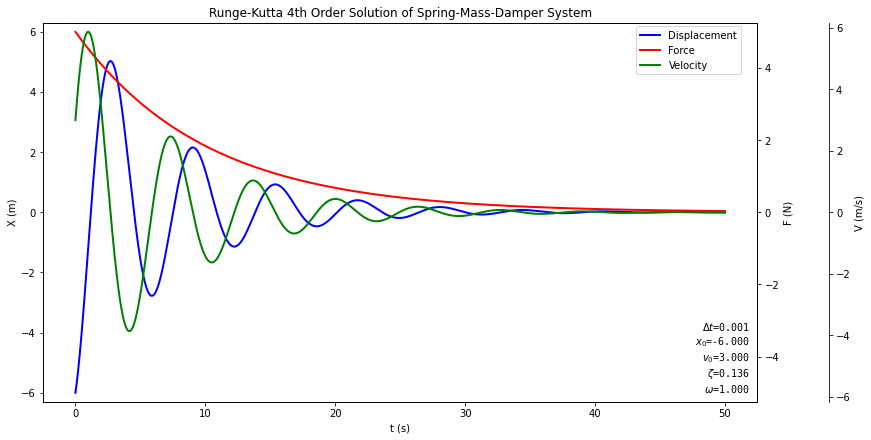

In [9]:
#study region
ti = 0 #s
tf = 50 #s
dt = 0.001 #s

#force equation (function of 'i')
ft = '5*exp(-0.1*t[i])'

#system properties
m = 11 #kg
b = 3 #s^-1
k = 11 #N/m
o = sqrt(k/m)
z = b/(2*m*o)

#initial system state
x0 = -6 #m
v0 = 3 #m/s

#simulate the system
[t, f, x, v] = spring_mass_damper(ti, tf, dt, ft, x0, v0, m,  z, o)

#plot results
results = (1,1,1)
title = 'Runge-Kutta 4th Order Solution of Spring-Mass-Damper System'
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

# Part 3 (Unforced Oscillation)

Test your code with all three unforced cases - overdamping, critically damped, and underdamping. You will choose the values of $\omega_n$ and $\zeta$. You will need to demonstrate your code works over a range of time-step sizes for all cases. Code and graphics are required. You should calculate and verify that both $x(t)$ and $v(t)$ can reliably be calculated using Runge-Kutta by numerically and graphically comparing the analytical solutions and the calculated values from your RK program.

## Over-Damped System Runge-Kutta/Analytical Comparison

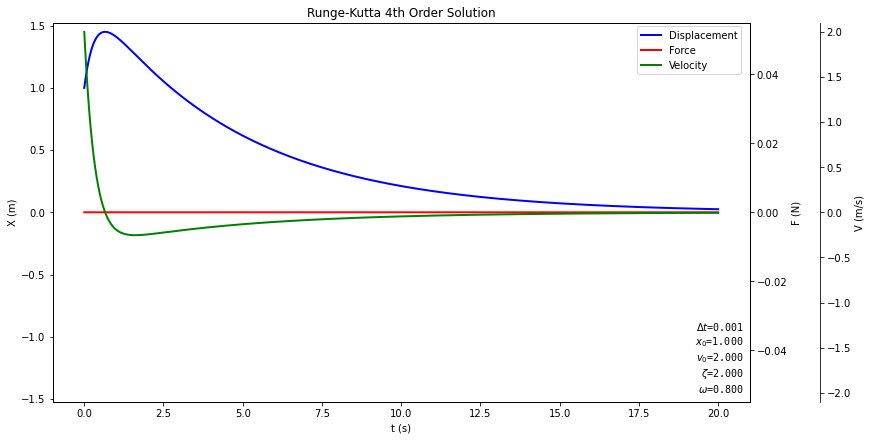

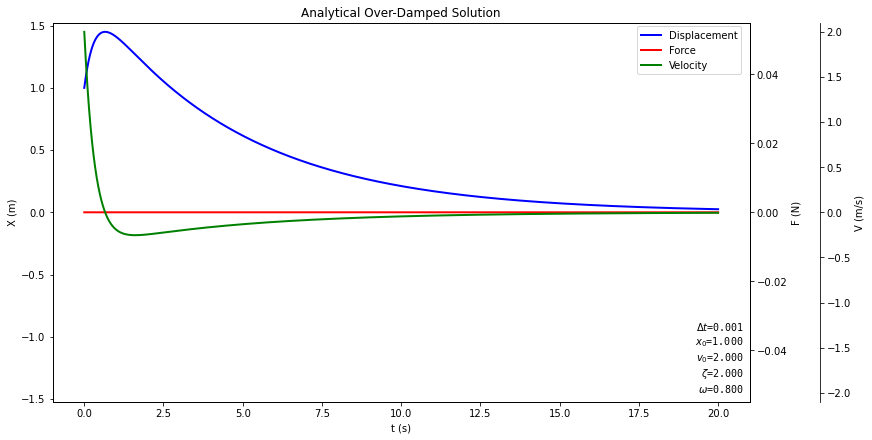

In [10]:
#study region
ti = 0 #s
tf = 20 #s
dt = 0.001 #s

#force equation (function of 'i')
ft = '0'

#system properties
z = 2.000
o = 0.800
m = 1 #kg

#initial system state
x0 = 1.000 #m
v0 = 2.000 #m/s

#plot analytical results
[t, f, x, v] = spring_mass_damper(ti, tf, dt, ft, x0, v0, m, z, o)
results = (1,1,1)
title = 'Runge-Kutta 4th Order Solution'
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

#plot analytical results
[x, v, title] = spring_mass_damper_overdamped(t, x0, v0, z, o)
results = (1,1,1)
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

## Over-Damped System Runge-Kutta Time Step Sensitivity

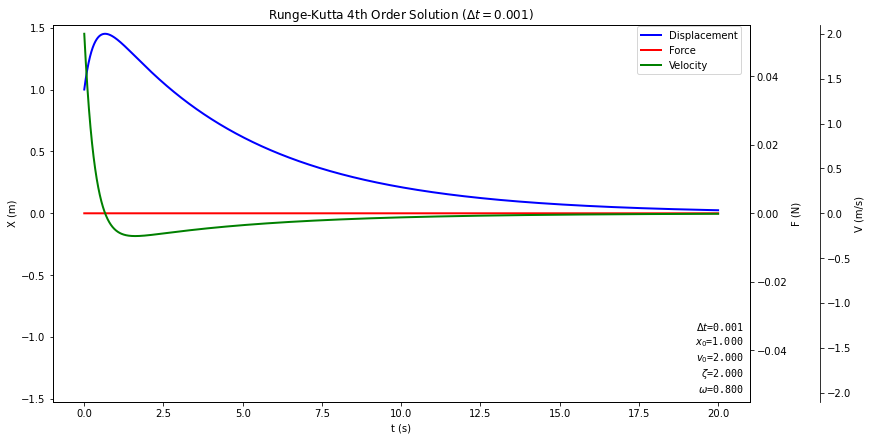

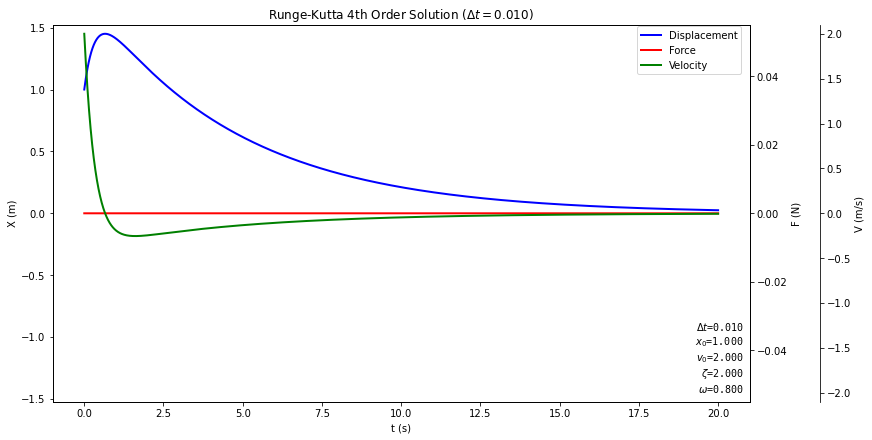

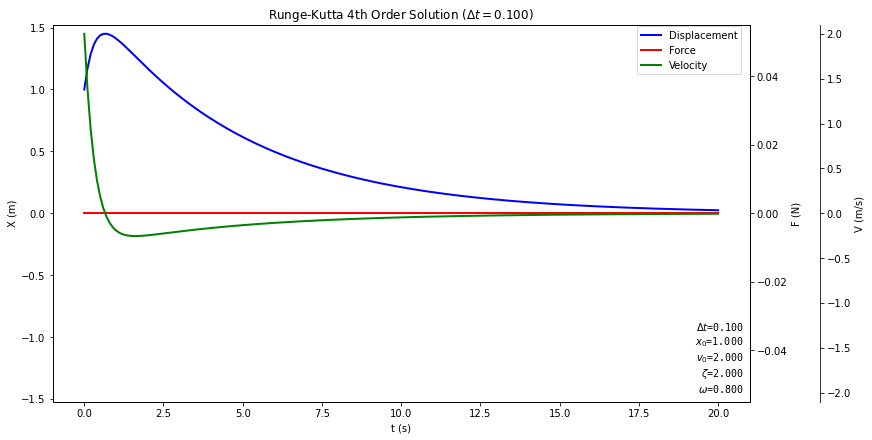

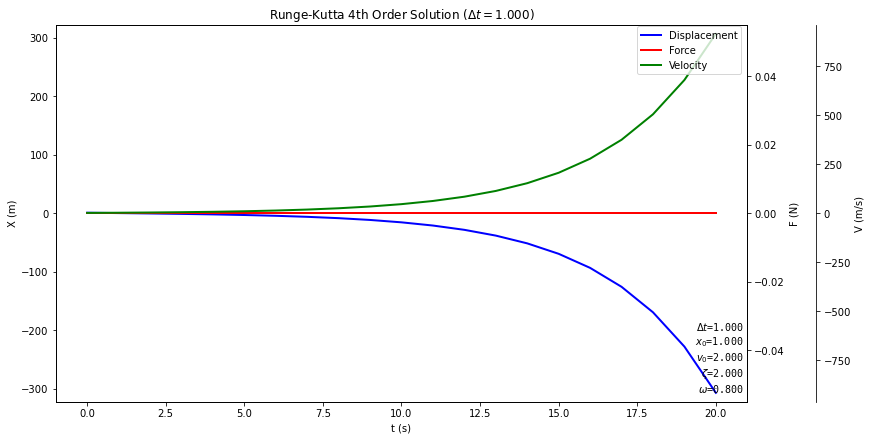

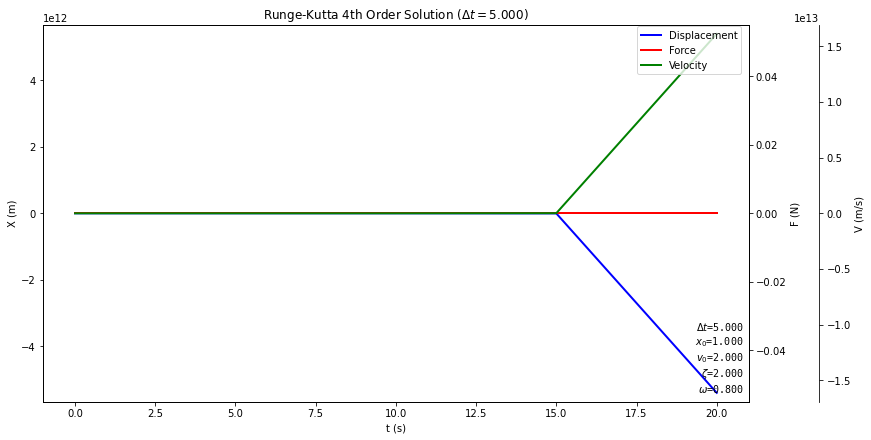

In [11]:
#study region
ti = 0 #s
tf = 20 #s

#force equation (function of 'i')
ft = '0'

#system properties
z = 2.000
o = 0.800
m = 1 #kg

#initial system state
x0 = 1.000 #m
v0 = 2.000 #m/s

#simulate the system at multiple time steps
dts = [0.001, 0.01, 0.1, 1, 5] #s
damped = 'over'
ap = 0
time_step_size(ti, tf, dts, ft, x0, v0, m, z, o, damped, ap)

## Critically-Damped System Runge-Kutta/Analytical Comparison

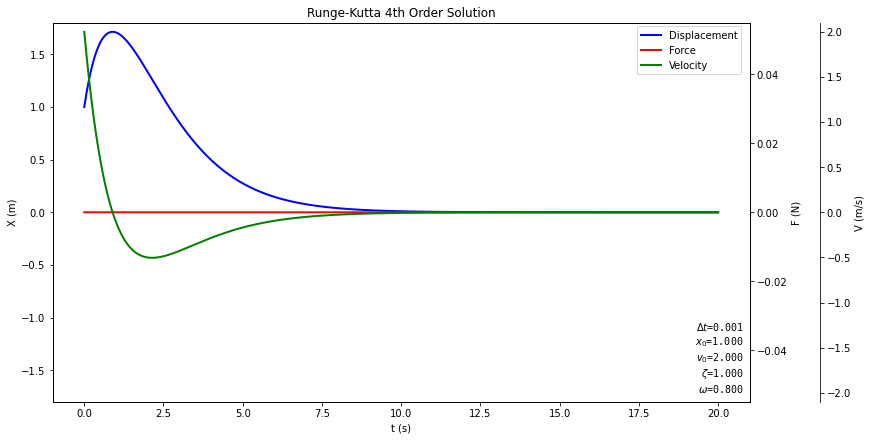

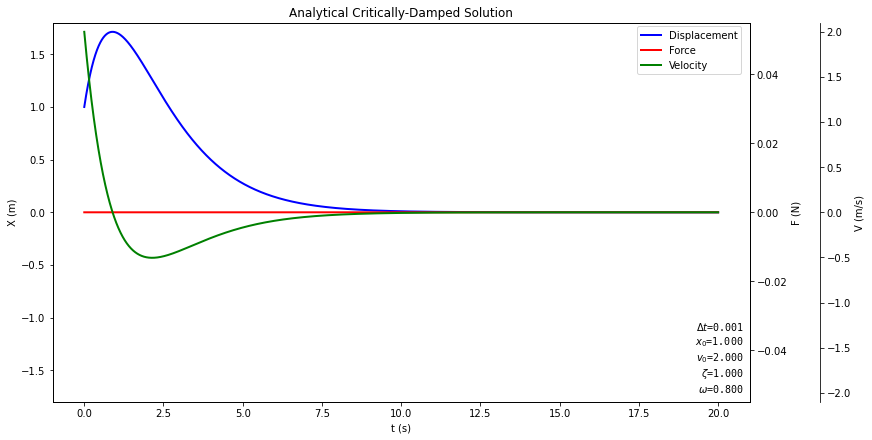

In [12]:
#study region
ti = 0 #s
tf = 20 #s
dt = 0.001 #s

#force equation (function of 'i')
ft = '0'

#system properties
z = 1.000
o = 0.800
m = 1 #kg

#initial system state
x0 = 1.000 #m
v0 = 2.000 #m/s

#plot analytical results
[t, f, x, v] = spring_mass_damper(ti, tf, dt, ft, x0, v0, m, z, o)
results = (1,1,1)
title = 'Runge-Kutta 4th Order Solution'
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

#plot analytical results
[x, v, title] = spring_mass_damper_criticallydamped(t, x0, v0, z, o)
results = (1,1,1)
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

## Critically-Damped System Runge-Kutta Time Step Sensitivity

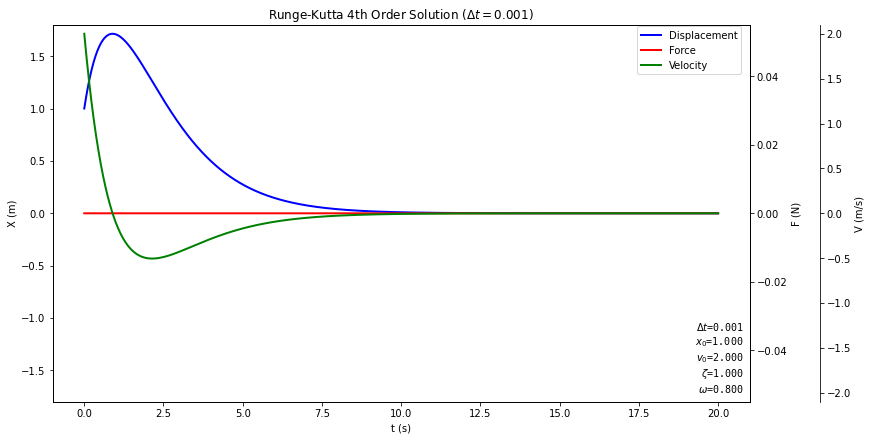

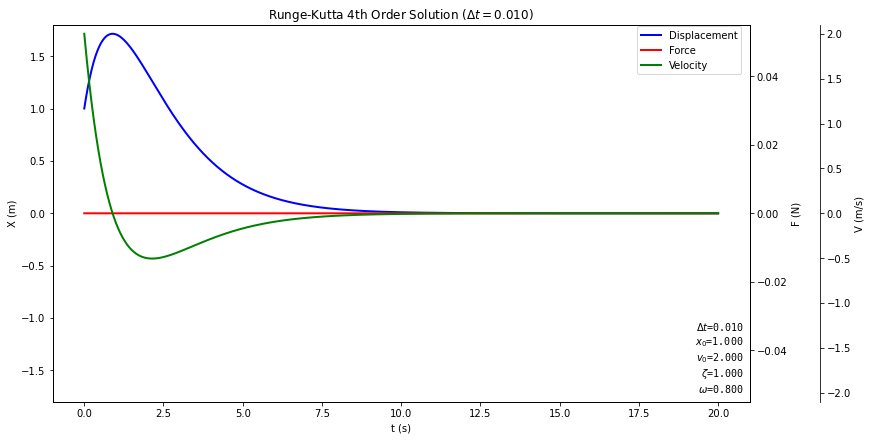

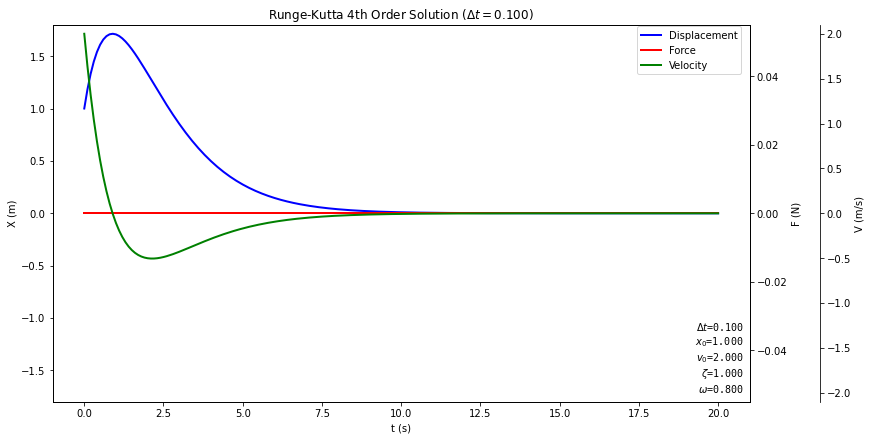

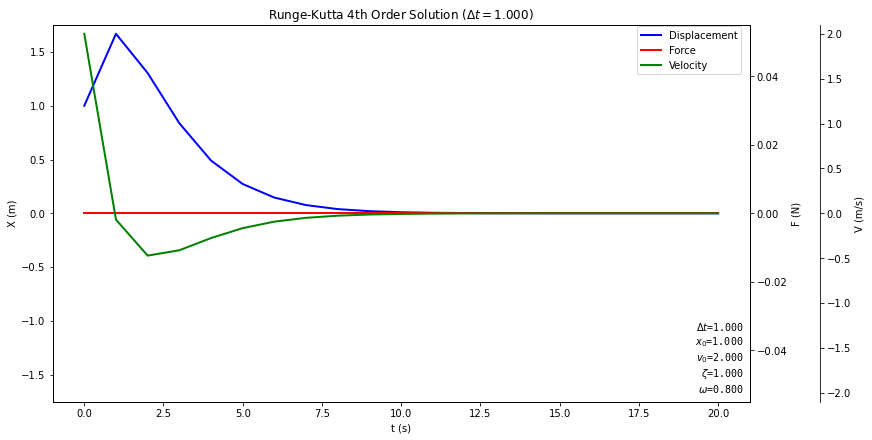

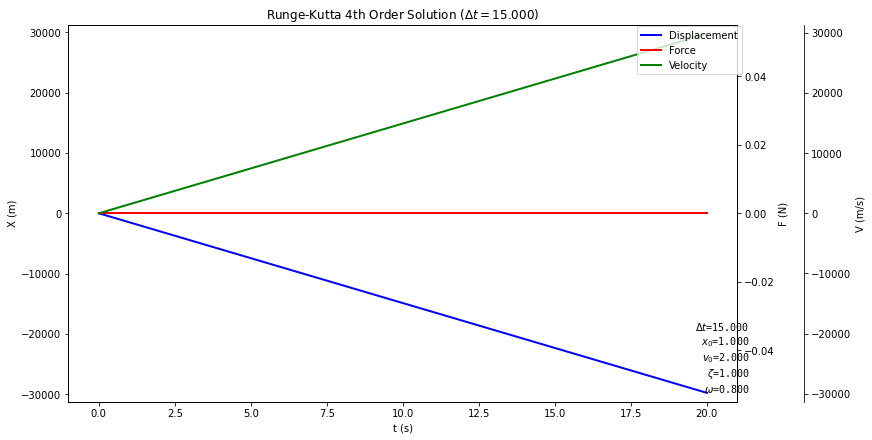

In [13]:
#study region
ti = 0 #s
tf = 20 #s

#force equation (function of 'i')
ft = '0'

#system properties
z = 1.000
o = 0.800
m = 1 #kg

#initial system state
x0 = 1.000 #m
v0 = 2.000 #m/s

#simulate the system at multiple time steps
dts = [0.001, 0.01, 0.1, 1, 15] #s
damped = 'critically'
ap = 0
time_step_size(ti, tf, dts, ft, x0, v0, m, z, o, damped, ap)

## Under-Damped System Runge-Kutta/Analytical Comparison

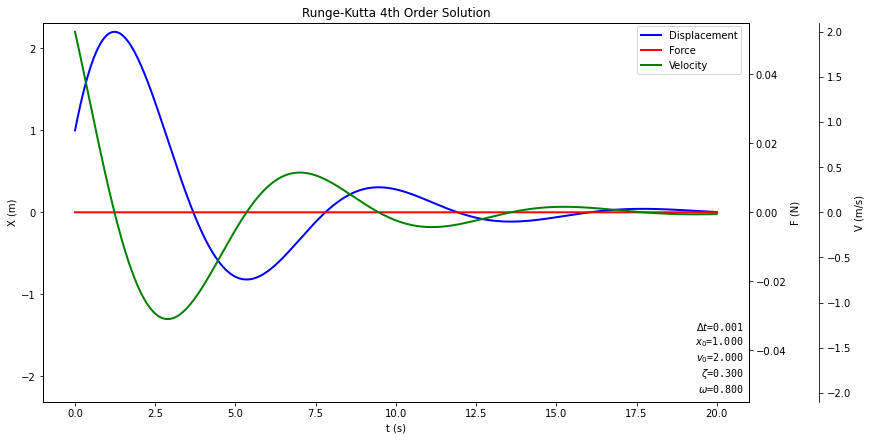

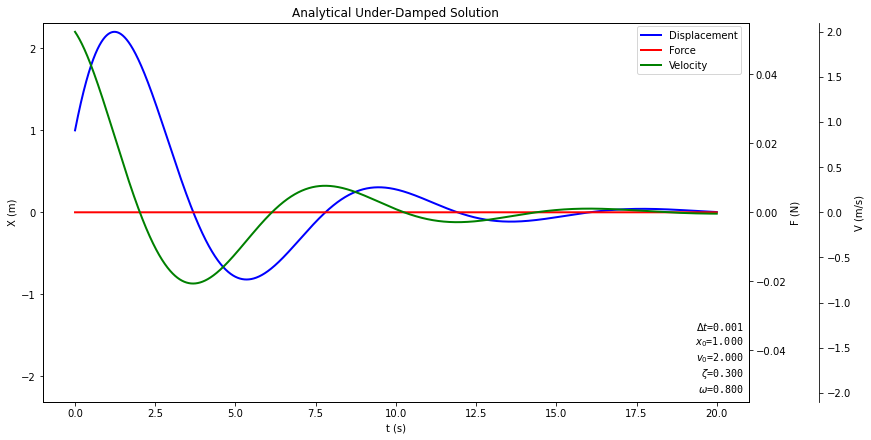

In [14]:
#study region
ti = 0 #s
tf = 20 #s
dt = 0.001 #s

#force equation (function of 'i')
ft = '0'

#system properties
z = 0.300
o = 0.800
m = 1 #kg

#initial system state
x0 = 1.000 #m
v0 = 2.000 #m/s

#plot analytical results
[t, f, x, v] = spring_mass_damper(ti, tf, dt, ft, x0, v0, m,  z, o)
results = (1,1,1)
title = 'Runge-Kutta 4th Order Solution'
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

#plot analytical results
[x, v, title] = spring_mass_damper_underdamped(t, x0, v0, z, o)
results = (1,1,1)
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

## Under-Damped System Runge-Kutta Time Step Sensitivity

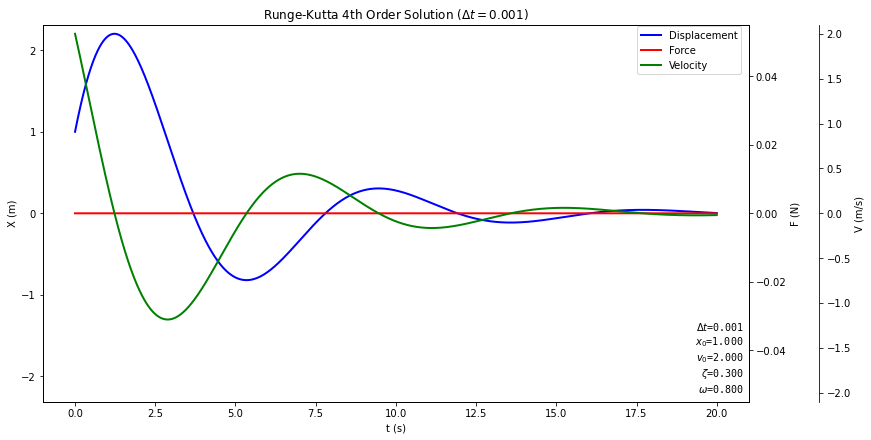

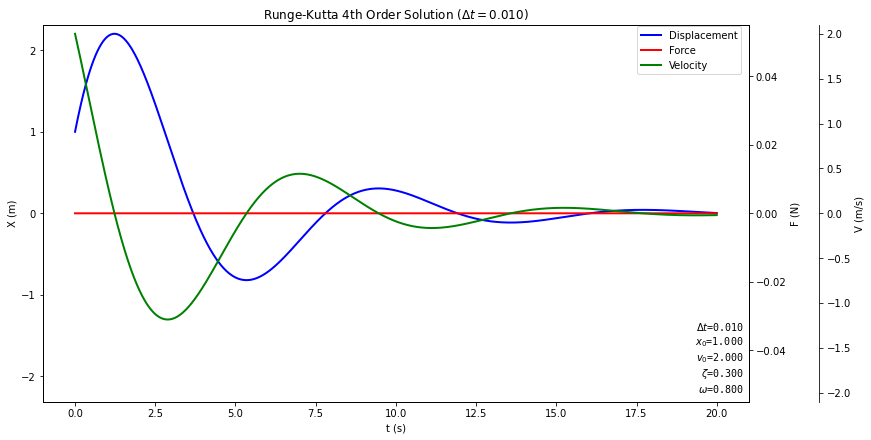

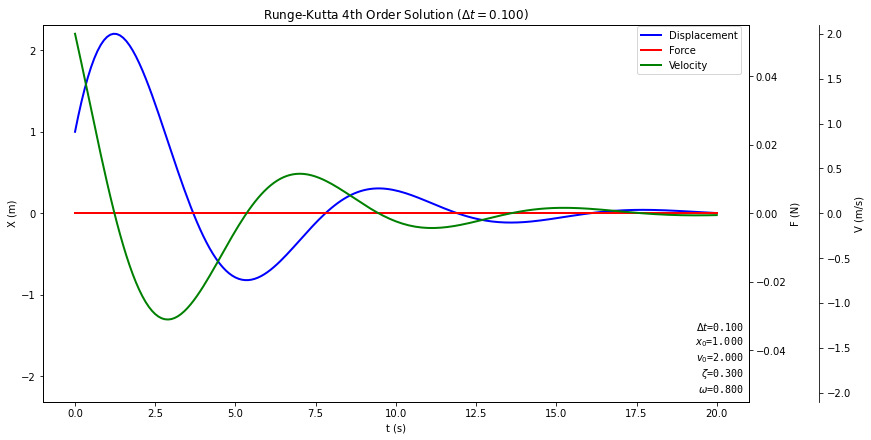

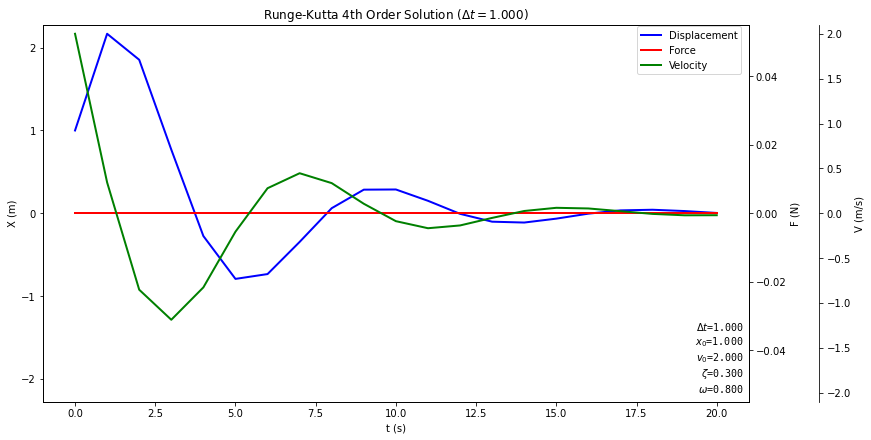

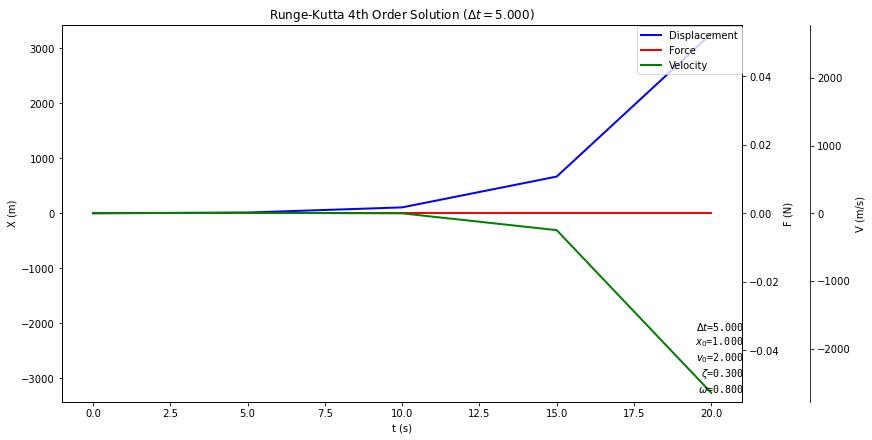

In [15]:
#study region
ti = 0 #s
tf = 20 #s

#force equation (function of 'i')
ft = '0'

#system properties
z = 0.300
o = 0.800
m = 1 #kg

#initial system state
x0 = 1.000 #m
v0 = 2.000 #m/s

#simulate the system at multiple time steps
dts = [0.001, 0.01, 0.1, 1, 5] #s
damped = 'under'
ap = 0
time_step_size(ti, tf, dts, ft, x0, v0, m, z, o, damped, ap)

# Part 4 (Forced Oscillation)

Test your code using values of F(t)/m. You must choose at least three values two of which may not be constant values of F(t) - i.e. there has to be some time variation of F. You should analyze the results of these tests. If there are known solutions for a given F(t) compare to those. In the end you need to convice the reader (Dr. Lemley) that your code is accurately calculating both x(t) and v(t) for each of these cases. Again, numerical and graphical evidence is required.

## Constant Force

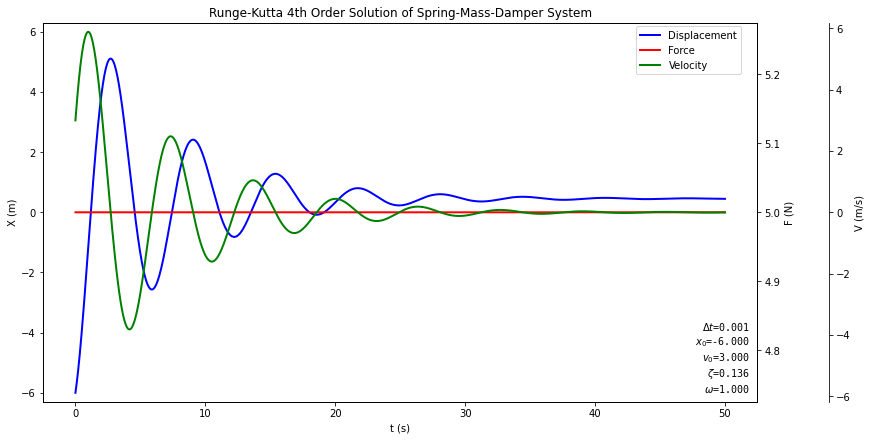

In [16]:
#study region
ti = 0 #s
tf = 50 #s
dt = 0.001 #s

#force equation (function of 'i')
ft = '5'

#system properties
m = 11 #kg
b = 3 #s^-1
k = 11 #N/m
o = sqrt(k/m)
z = b/(2*m*o)

#initial system state
x0 = -6 #m
v0 = 3 #m/s

#simulate the system
[t, f, x, v] = spring_mass_damper(ti, tf, dt, ft, x0, v0, m,  z, o)

#plot results
results = (1,1,1)
title = 'Runge-Kutta 4th Order Solution of Spring-Mass-Damper System'
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

## Ramping Force

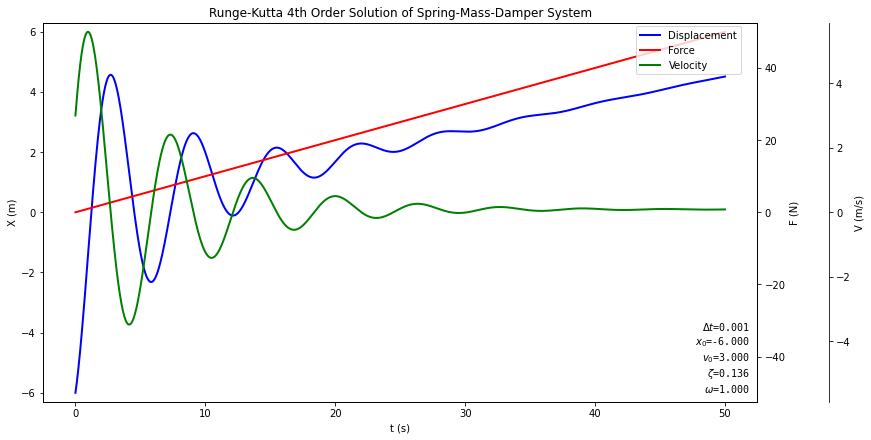

In [17]:
#study region
ti = 0 #s
tf = 50 #s
dt = 0.001 #s

#force equation (function of 'i')
ft = 't[i]'

#system properties
m = 11 #kg
b = 3 #s^-1
k = 11 #N/m
o = sqrt(k/m)
z = b/(2*m*o)

#initial system state
x0 = -6 #m
v0 = 3 #m/s

#simulate the system
[t, f, x, v] = spring_mass_damper(ti, tf, dt, ft, x0, v0, m,  z, o)

#plot results
results = (1,1,1)
title = 'Runge-Kutta 4th Order Solution of Spring-Mass-Damper System'
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

## Sinusoidal Force

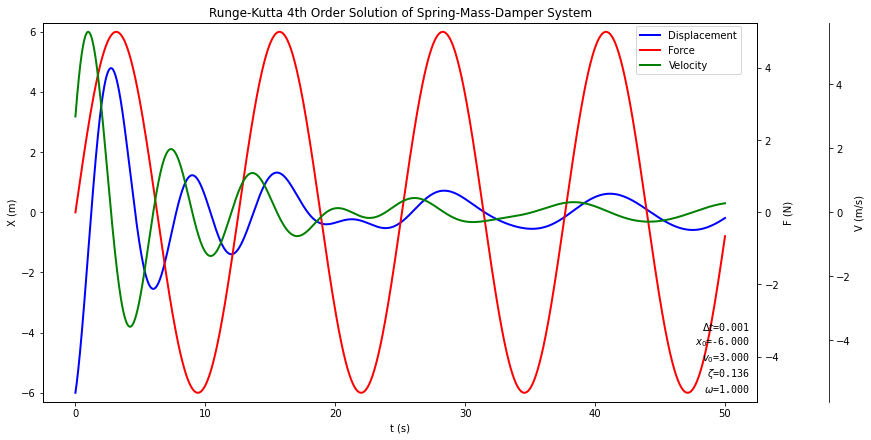

In [18]:
#study region
ti = 0 #s
tf = 50 #s
dt = 0.001 #s

#force equation (function of 'i')
ft = '5*sin(0.5*t[i])'

#system properties
m = 11 #kg
b = 3 #s^-1
k = 11 #N/m
o = sqrt(k/m)
z = b/(2*m*o)

#initial system state
x0 = -6 #m
v0 = 3 #m/s

#simulate the system
[t, f, x, v] = spring_mass_damper(ti, tf, dt, ft, x0, v0, m,  z, o)

#plot results
results = (1,1,1)
title = 'Runge-Kutta 4th Order Solution of Spring-Mass-Damper System'
my_plot_system(t, f, x, v, dt, x0, v0, z, o, results, title)

# Part 5 (Resonant Frequency Test)

Finally test your code with $F(t)/m = Acos({\omega_f t})$ where you choose the value of $A$. You should vary $\omega_d$ over a range of values such that you can see instances where the oscillations of x(t) are growing out of control over time (i.e. resonance). Graphically show how this occuring by displaying cases with different $\omega_f$ change the velocity and position over time.

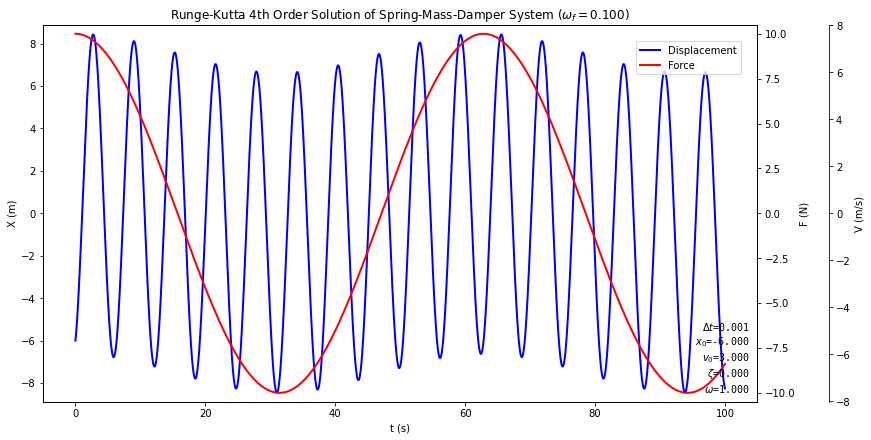

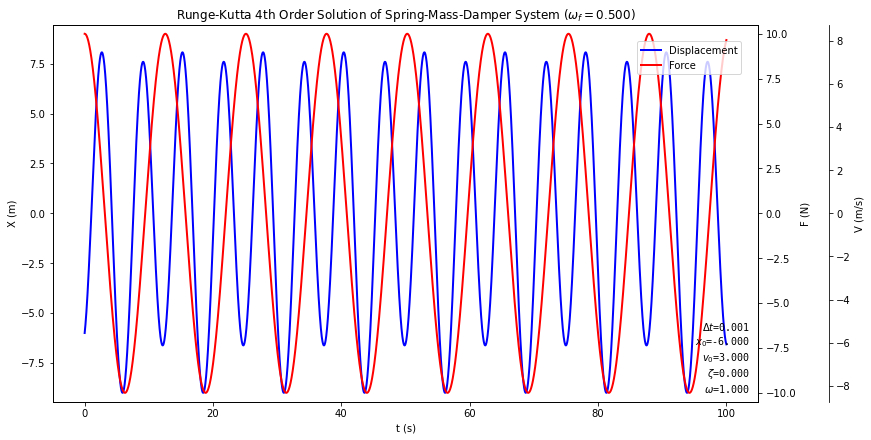

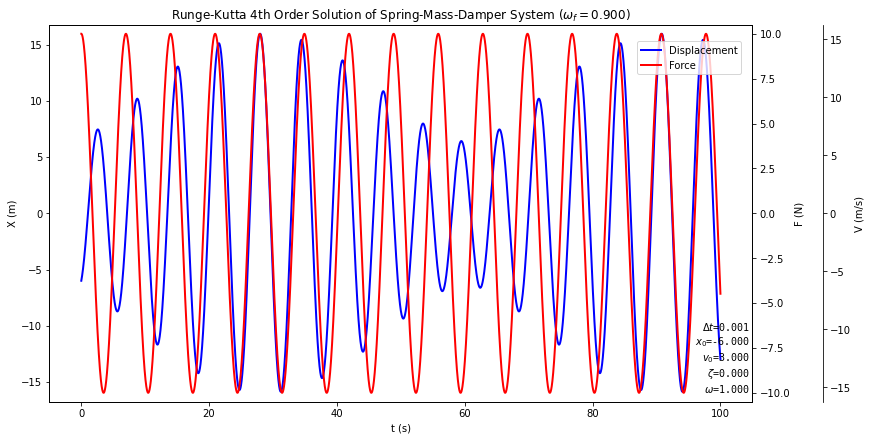

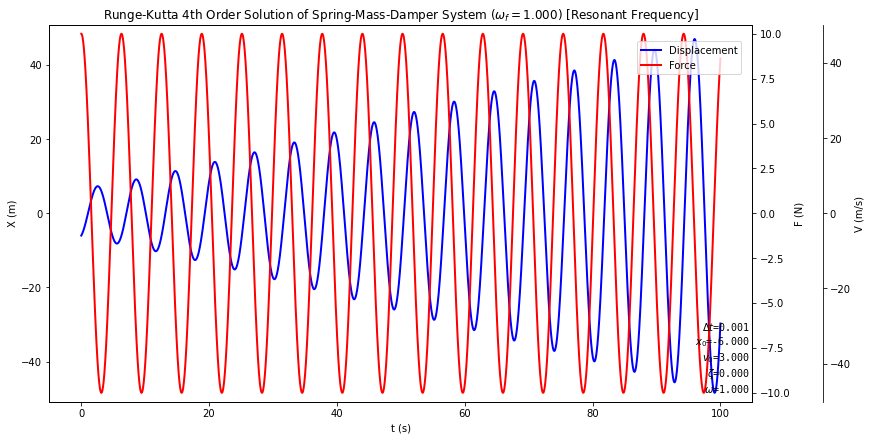

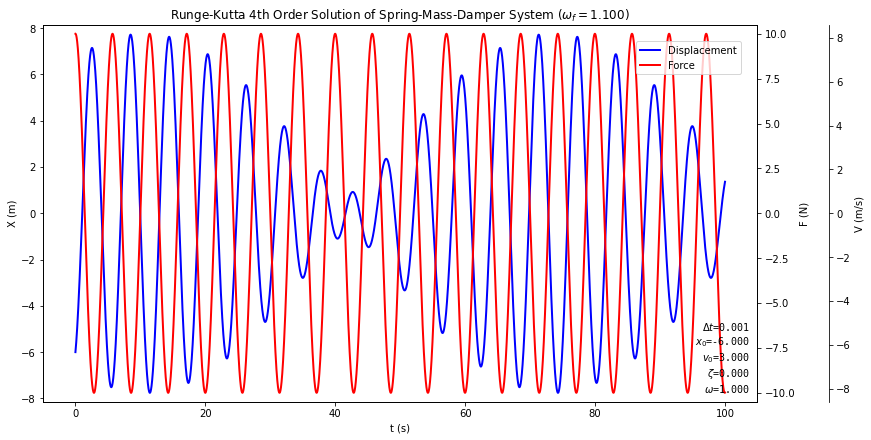

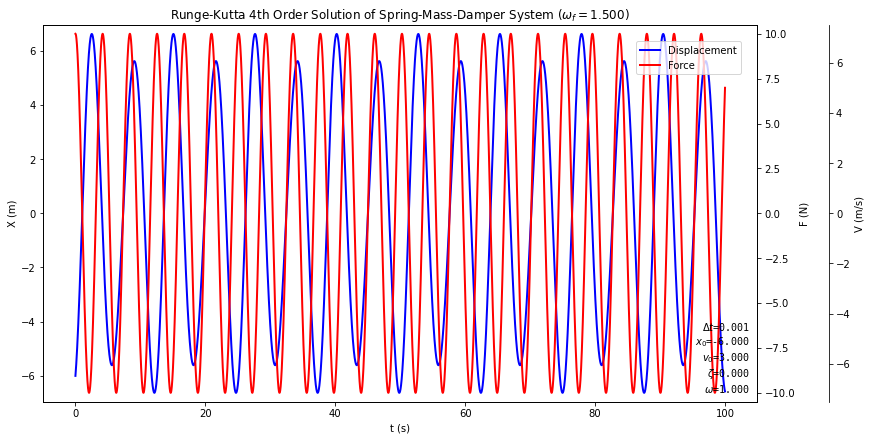

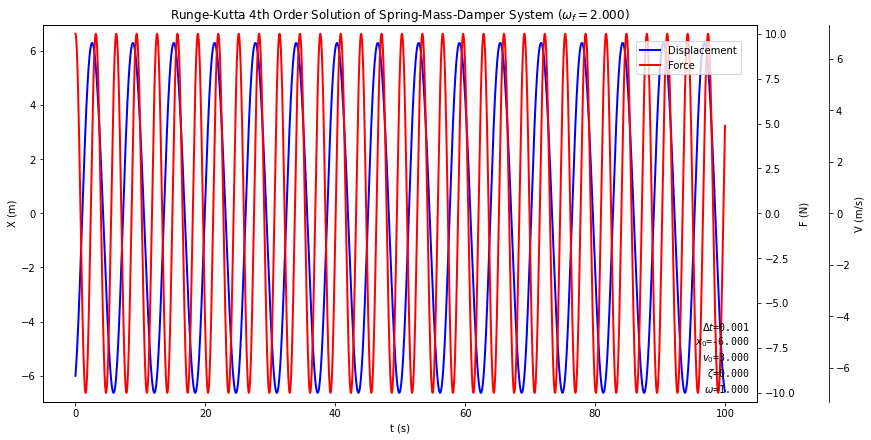

In [19]:
#study region
ti = 0 #s
tf = 100 #s
dt = 0.001 #s

#system properties
m = 11 #kg
b = 0 #s^-1
k = 11 #N/m
o = sqrt(k/m)
z = b/(2*m*o)

#initial system state
x0 = -6 #m
v0 = 3 #m/s

#plot resonance test
results = (1,1,0)
resonance_test(ti, tf, dt, x0, v0, m, z, o, results)